# Power Analysis
This notebook calculates how many experimental and more control rats we need to do to get a power (hit rate) of 80%. **Summary at the end!**

Shijie Gu, May 15, 2024

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import random
import scipy.stats

### 1. Here we first input data points from experiments

In [4]:
data = {} #learning days
data['control'] = [4,5,6,4] #Eliot, Klein, Haydn, Lewis
data['opto'] = [0] #Bravelu

### 2. Next we make up future possible opto data and control rats.
We assume that learning days are distributed as follows:
- non opto animals: uniformly distributed from 4-6.
- opto animals: uniformly distributed from 0-5.

In [5]:
# Set seed for reproducible research
np.random.seed(2024)
for d in np.random.randint(4,6, size=2):
    data['control'].append(d)
for d in np.random.randint(2,5, size=3):
    data['opto'].append(d)

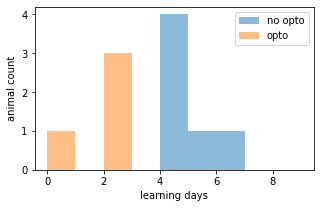

In [6]:
fig,axe=plt.subplots(1,1,figsize=(5,3));
axe.hist(data['control'],np.arange(10),alpha=0.5,label = 'no opto');
axe.hist(data['opto'],np.arange(10),alpha=0.5,label = 'opto');
axe.set_xlabel("learning days");
axe.set_ylabel("animal count");
axe.legend();

In [7]:
_,p_value=scipy.stats.mannwhitneyu(data['opto'],data['control'], use_continuity=True,
                             alternative='less')
#use_continuity as there could be tied rank

In [8]:
p_value

0.005189361625218088

### 3. Now ramp up the one example above to simulate power

In [9]:
B = 1000 #simulate 1000 time

result = np.zeros(B) + np.nan
for b in range(B):
    # experimental data
    data = {}
    data['control'] = [4,5,6,4] #Eliot, Klein, Haydn, Lewis
    data['opto'] = [0] #Bravelu

    # Next we make up future possible opto data and control rats
    # Set seed for reproducible research
    np.random.seed(2024+b)
    for d in np.random.randint(4,6, size=2):
        data['control'].append(d)
    for d in np.random.randint(1,5, size=3):
        data['opto'].append(d)
    _,p_value=scipy.stats.mannwhitneyu(data['opto'],data['control'], use_continuity=True,
                             alternative='less')
    result[b] = p_value

In [10]:
power = np.sum(result <= 0.02)/B
print(power)

0.86


In [11]:
power = np.sum(result <= 0.05)/B
print(power)

0.996


# Summary (using learning days as a metric)
Learning days is defined to be the number of days it takes for the animals to adjust their arm transitions to match the target sequence the most.

The number of days for animals to learn the new sequence for the animals we currently have run is listed below. 
- Non opto: 4 days (2 animals), 5 days (1 animal), 6 days (1 animal).
- Opto: 0 days (1 animal), which means on the day of switching to the new sequence, within 3 sessions, the animal was able to adapt to the new sequence.

Given these preliminary data, we suppose that learning days are distributed as follows:
- non opto animals: uniformly distributed from 4-6.
- opto animals: uniformly distributed from 1-5.

Suppose we collect data from 3 opto animals and 2 additional animals with delayed opto light triggering as control, assuming the distrubutions above, the power is 86% with rank-sum test (alpha = 0.02) and 99.6% (alpha = 0.05).

### 4. Do the same, but the metric is the number of sessions
The number of sessions is defined to be the number of sessions it takes for the animals to adjust their arm transitions to match the target sequence the most in **two consecutive sessions**.

In [12]:
B = 1000 #simulate 1000 time

result = np.zeros(B) + np.nan
for b in range(B):
    # experimental data
    data = {}
    data['control'] = [24,20,35,20] #Eliot, Klein, Haydn, Lewis
    data['opto'] = [0] #Bravelu

    # Next we make up future possible opto data and control rats
    # Set seed for reproducible research
    np.random.seed(2024+b)
    for d in np.random.randint(15,30, size=2):
        data['control'].append(d)
    for d in np.random.randint(5,20, size=3):
        data['opto'].append(d)
    _,p_value=scipy.stats.mannwhitneyu(data['opto'],data['control'], use_continuity=True,
                             alternative='less')
    result[b] = p_value

In [13]:
power = np.sum(result <= 0.02)/B
print(power)

0.932


In [14]:
power = np.sum(result <= 0.05)/B
print(power)

0.998


# Summary 2 (using the number of sessions as a metric)

The number of sessions is defined to be the number of sessions it takes for the animals to adjust their arm transitions to match the target sequence the most in **two consecutive sessions**.

The number of sessions for animals to learn the new sequence for the animals we currently have run is listed below. 
- Non opto: 20 sessions (2 animals), 24 days (1 animal), 35 days (1 animal).
- Opto: 0 sessions (1 animal), which means within the 80 trials on the very first new sequence session, the animal was able to adapt to the new sequence. [All animals do not do perfect sequence at all time, but there are differences in how animals capitalize on the mistakes/exploration. In the non-stim group, it takes a couple days for the "mistakes" to be seen as the correct sequence, while the behavior of Bravelu (opto SWR stim rat) upon disruption is such that he was able to quickly adapt when lucky mistakes turned out to be all correct.]

Given these preliminary data, we suppose that learning days are distributed as follows:
- non opto animals: uniformly distributed from 15-30.
- opto animals: uniformly distributed from 5-20.
Note that we assume that the the pilot animal's data point is an outlier, and assume a more mild seperation between groups.

Suppose we collect data from 3 opto animals and 2 additional animals with delayed opto light triggering as control, assuming the distrubutions above, the power is 93.2% with rank-sum test (alpha = 0.02) and 99.8% (alpha = 0.05).

In [16]:
def simulate(low):
    """
    Suppose the stim group learning session number distribution ~ Uniform (low,low + 15)
    while that of non stim/control ~ ~ Uniform (15,30)
    """
    B = 1000 #simulate 1000 time

    result = np.zeros(B) + np.nan
    for b in range(B):
        # experimental data
        data = {}
        data['control'] = [24,20,35,20] #Eliot, Klein, Haydn, Lewis
        data['opto'] = [0] #Bravelu

        # Next we make up future possible opto data and control rats
        # Set seed for reproducible research
        np.random.seed(2024+b)
        for d in np.random.randint(15,30, size=2):
            data['control'].append(d)
        for d in np.random.randint(low,low + 15, size=3):
            data['opto'].append(d)
        _,p_value=scipy.stats.mannwhitneyu(data['opto'],data['control'], use_continuity=True,
                                 alternative='less')
        result[b] = p_value
    
    power_2 = np.sum(result <= 0.02)/B
    power_5 = np.sum(result <= 0.05)/B
    
    return power_2,power_5

In [20]:

lows = np.arange(5,25,2)
results = np.zeros((len(lows),2))
for r in range(len(lows)):
    power_2,power_5 = simulate(lows[r])
    results[r,0] = power_2
    results[r,1] = power_5

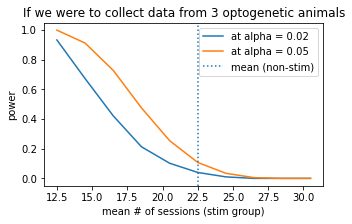

In [33]:
fig,axe=plt.subplots(1,1,figsize=(5,3));

means = lows+7.5
axe.plot(means,results[:,0],label = 'at alpha = 0.02')
axe.plot(means,results[:,1],label = 'at alpha = 0.05')
axe.axvline(45/2,linestyle=':',label = 'mean (non-stim)');
axe.set_xlabel("mean # of sessions (stim group)");
axe.set_ylabel("power");
axe.set_title("If we were to collect data from 3 optogenetic animals");
axe.legend();